In [48]:
from fastai.vision.all import *

In [49]:
root_dir = Path('../../')
training_data_path = root_dir.joinpath('training-data/train')
validation_data_path = root_dir.joinpath('training-data/valid')

In [50]:
def label_func(fname):
    return fname.name.split("_")[0]

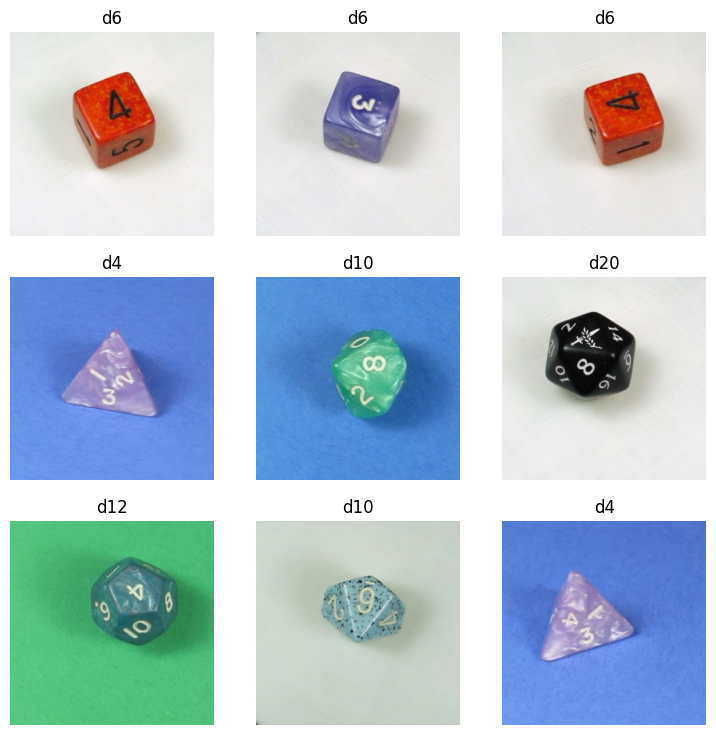

In [51]:
dblock = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    get_y=label_func,
    splitter=RandomSplitter(),
    item_tfms=Resize(300),
)
dls = dblock.dataloaders(training_data_path)
dls.show_batch()

In [52]:
learn = Learner(dls, xresnet50(n_out=dls.c), opt_func=ranger,
                loss_func=LabelSmoothingCrossEntropyFlat(),
                metrics=accuracy)

In [53]:
learn.fit_flat_cos(5, 8e-3)

epoch,train_loss,valid_loss,accuracy,time
0,0.884205,1.411412,0.578781,06:55
1,0.628991,1.485520,0.609244,06:48


In [ ]:
learn.predict(validation_data_path.joinpath('d20/d20_off-angle_0345.jpg').resolve())

In [ ]:
# Set the root directory of the learner to the root directory of the project
learn.path = root_dir


In [ ]:
learn.save('5epoch')